In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

Step 1 : Understand problem statement 

In [ ]:
df=pd.read_csv('../input/ccdata/CC GENERAL.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#Who's the customer that made the maximum purchaces

df.iloc[df['PURCHASES'].idxmax()]

Vizualiztion 

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
df.isnull().sum()

Replace the missing values of MINIMUM_PAYMENTS with the mean value 

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)


In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

No null values 

In [ ]:
#Check Duplicate values in the dataset

df.duplicated().sum()

so, we have no duplicates 

In [ ]:
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,50))

for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={"color":"b", "lw":3 ,'label':'KDE'},hist_kws={"color":'g'})
    plt.title(df.columns[i])
    
plt.tight_layout()

In [ ]:
# Correaltion matrix between features

correlations=df.corr()
f,ax=plt.subplots(figsize=(20,10))

sns.heatmap(correlations,annot=True)

## K-means algorithm

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.


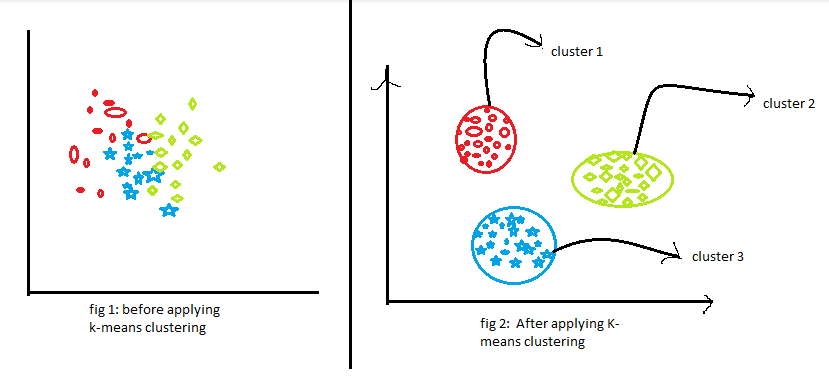

the objective of K-means is simple: **group similar data points together and discover underlying patterns**. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

> A cluster refers to a collection of data points aggregated together because of certain similarities.

### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
It halts creating and optimizing clusters when either:
The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

## Elbow method 

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. 

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

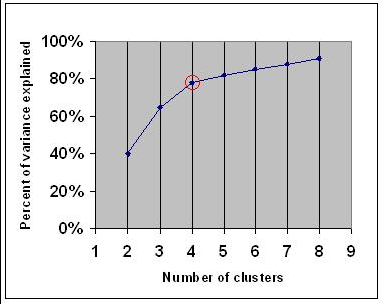

Scale our data

In [ ]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
df_scaled.shape

In [ ]:
df_scaled

Now our values are in the same range. 
Let's apply k means algorithm

In [ ]:
scores=[]

range_values=range(1,20)
for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_scaled)
    scores.append(kmean.inertia_)
    
plt.plot(scores,'bx-')

from this plot we can observe that 7 or 8 clusters seeming to perform the curve

we can choose the number of clustrs 7 or 8

## Apply the k-means

In [ ]:
kmean= KMeans(7)
kmean.fit(df_scaled)

#  Output labels
label=kmean.labels_

In [ ]:
kmean.cluster_centers_.shape

We are going to make a dataframe with the cluster centers

In [ ]:
cluster_centers=pd.DataFrame(data=kmean.cluster_centers_, columns= [df.columns])
cluster_centers

In [ ]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers



In [ ]:
label.shape

In [ ]:
label.max()

In [ ]:
label.min()

In [ ]:
y=kmean.fit_predict(df_scaled)
y

In [ ]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':label})],axis=1)

We added the cluster label 

In [ ]:
df_cluster

## Visualization 

In [ ]:
# Plot histogram 

for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        
    plt.show()

## Principal Component Analysis - PCA

In [ ]:
# dimensinality reduction 

pca=PCA(n_components=2)

pcafit=pca.fit_transform(df_scaled)
pcafit


In [ ]:
pca_df = pd.DataFrame(data=pcafit,columns=['pca1','pca2'])
pca_df

In [ ]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)

In [ ]:
pca_df

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow','pink','gray','purple'])